### Relevante pakker

In [29]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [31]:
df = pd.read_csv("../data/lego.population.csv", sep = ",", encoding = "latin1")
df.head()
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [32]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages', 'Minifigures', 'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter (I virkeligheten er det risikabelt å fjerne manglende data punkter uten videre. Dette kan påvirke resultatene på en måte som er vanskelig å avdekke.)
# Det finnes metoder som tar hensyn til tomme dataceller men dette prosjektet har ikke dette som en del av oppgaven, slik at vi velger å ta utgangspunkt i det originale datasettet.
df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

df2

<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
C:\Users\vikto\AppData\Local\Temp\ipykernel_28316\115111130.py:13: SyntaxWarning: invalid escape sequence '\$'
  df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)


,Set_Name,Theme,Pieces,Price,Pages,Minifigures,Unique_Pieces
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,1.0,52.0
16,Woody & RC,Disney,69.0,9.99,28.0,1.0,36.0
17,Mia's Summer Heart Box,Friends,85.0,7.99,36.0,1.0,41.0
18,Olivia's Summer Heart Box,Friends,93.0,7.99,40.0,2.0,48.0
19,Police Patrol Car,City,92.0,9.99,36.0,1.0,52.0
...,...,...,...,...,...,...,...
1171,1989 Batmobile,Batman,3306.0,249.99,404.0,3.0,484.0
1172,Tree House,Ideas,3036.0,199.99,428.0,4.0,482.0
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,13.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,6.0,525.0


Code:

### Mer eller mindre relevante kodesnutter

In [33]:
print(df2.mean(numeric_only = True))

Pieces           413.570028
Price             46.351345
Pages            103.260504
Minifigures        3.215686
Unique_Pieces    144.670868
dtype: float64


In [34]:
print(df2['Theme'].value_counts())

Theme
Friends              94
City                 94
Star Wars            85
NINJAGO              77
Marvel               47
Disney               35
DUPLO                32
THE LEGO MOVIE 2     25
Harry Potter         22
Minecraft            21
Creator 3-in-1       21
Hidden Side          19
Jurassic World       19
Speed Champions      17
Batman               16
Juniors              12
Creator Expert       10
Monkie Kid            9
Ideas                 8
DC                    8
Trolls World Tour     8
Overwatch             7
LEGO Frozen 2         7
Unikitty              6
Classic               4
Minifigures           3
Spider-Man            2
Powerpuff Girls       2
Minions               2
Stranger Things       1
Powered UP            1
Name: count, dtype: int64


In [35]:
print(df2['Theme'].unique())

['Friends' 'Disney' 'City' 'Unikitty' 'NINJAGO' 'DUPLO' 'Star Wars'
 'Minecraft' 'Marvel' 'Batman' 'THE LEGO MOVIE 2' 'Speed Champions'
 'Harry Potter' 'Hidden Side' 'LEGO Frozen 2' 'Trolls World Tour'
 'Minions' 'Powerpuff Girls' 'Jurassic World' 'Overwatch' 'Classic'
 'Spider-Man' 'Juniors' 'Creator 3-in-1' 'DC' 'Ideas' 'Creator Expert'
 'Stranger Things' 'Monkie Kid' 'Minifigures' 'Powered UP']


In [36]:
df2['LegoGroup'] = np.where(df2['Theme'].isin(['Harry Potter', 'Star Wars', 'Batman', 'DC', 'Disney', 'Marvel', 'Minecraft', 'LEGO Frozen 2', 'Trolls World Tour', 'Minions', 'Powerpuff Girls', 'Jurassic World', 'Overwatch', 'Spider-Man', 'Stranger Things']), 0, 
                      np.where(df2['Theme'].isin(['City', 'Friends', 'Unikitty', 'NINJAGO', 'DUPLO', 'THE LEGO MOVIE 2', 'Speed Champions', 'Hidden Side', 'Classic', 'Juniors', 'Creator 3-in-1', 'Ideas', 'Creator Expert', 'Monkie Kid', 'Minifigures', 'Powered UP']), 1, 2))
df2.groupby(['LegoGroup']).size().reset_index(name = 'Count')

,LegoGroup,Count
0,0,282
1,1,432


In [37]:
# Gruppere temaer i nye grupper:
# (Harry Potter, NINJAGO og Star Wars havner i én gruppe, City og Friends i en annen, og alle andre i en tredje)
#df2['Gender'] = np.where(df2['Theme'].isin(['Star Wars', 'Batman', 'DC', 'Marvel', 'Minecraft', 'NINJAGO', 'Jurassic World', 'Overwatch', 'Spider-Man', 'Speed Champions', 'Monkie Kid', 'Hidden Side', 'Powered UP']), 0, 
 #                     np.where(df2['Theme'].isin(['LEGO Frozen 2', 'Friends', 'Unikitty', 'Powerpuff Girls']), 1, 2))
#df2.groupby(['Gender']).size().reset_index(name = 'Count')

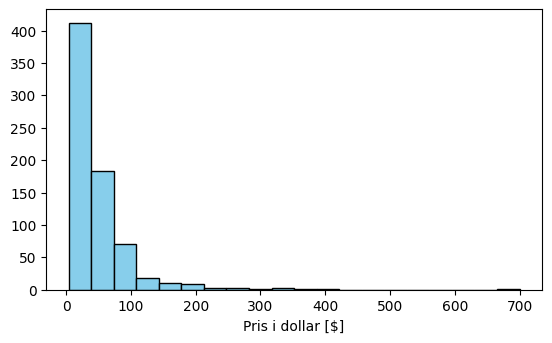

In [38]:
plt.hist(df2['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pris i dollar [$]')
plt.ylabel('')
plt.gca().set_aspect(1)
plt.show()

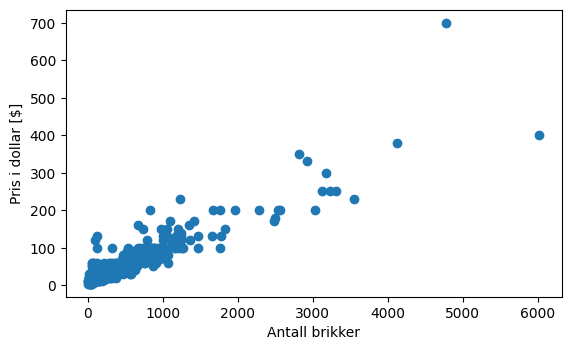

In [39]:
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()

In [40]:
# hva er det dyreste settet i datasettet mon tro?
print(df2.loc[df2['Price'].idxmax()])

Set_Name         Imperial Star Destroyer
Theme                          Star Wars
Pieces                            4784.0
Price                             699.99
Pages                              444.0
Minifigures                          2.0
Unique_Pieces                      445.0
LegoGroup                              0
Name: 825, dtype: object


In [41]:
# og hvilket har flest brikker?
print(df2.loc[df2['Pieces'].idxmax()])

Set_Name         Hogwarts Castle
Theme               Harry Potter
Pieces                    6020.0
Price                     399.99
Pages                      636.0
Minifigures                 28.0
Unique_Pieces              624.0
LegoGroup                      0
Name: 821, dtype: object


In [42]:
# hvilke tema har de billigste settene?
df2.groupby('Theme')['Price'].mean().sort_values(ascending=True)[:3]

Theme
Minifigures        12.99
Unikitty           18.99
Powerpuff Girls    24.99
Name: Price, dtype: float64

In [43]:
# hvilke tema har flest brikker?
df2.groupby('Theme')['Pieces'].mean().sort_values(ascending=False)[:3]

Theme
Powered UP         2925.0
Stranger Things    2287.0
Creator Expert     2073.5
Name: Pieces, dtype: float64

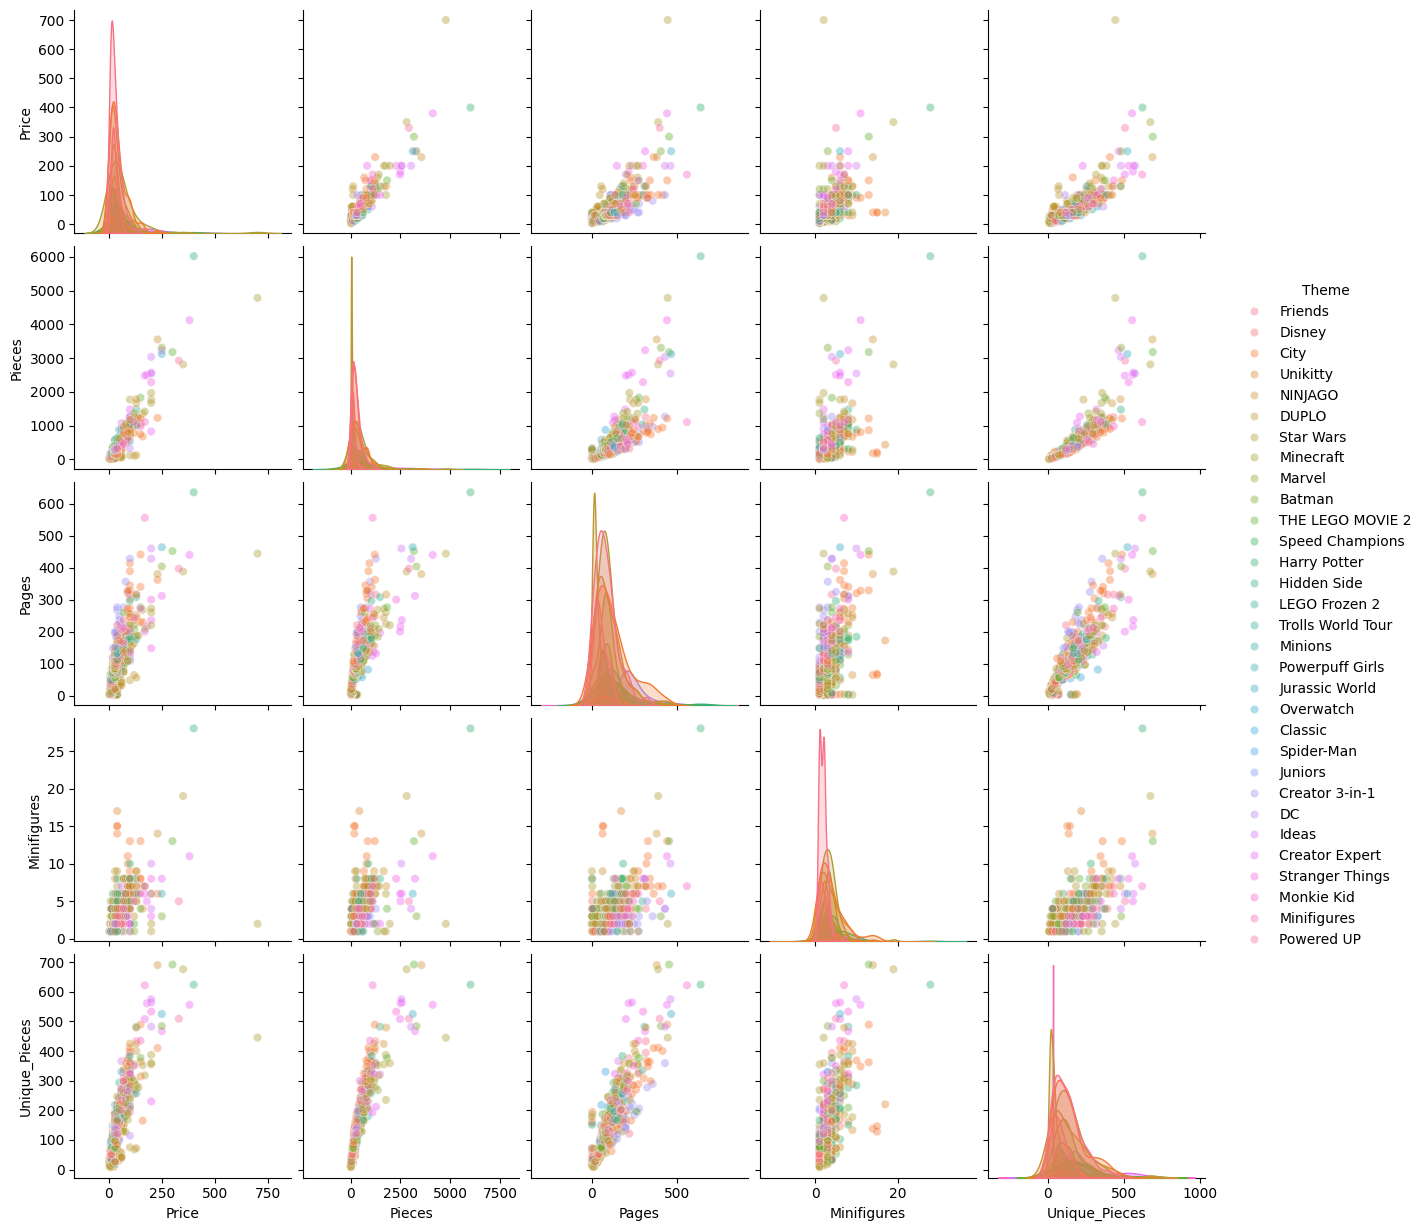

In [44]:
sns.pairplot(df2, vars = ['Price', 'Pieces', 'Pages', 'Minifigures', 'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [45]:
# enkel lineær regresjon
formel = 'Price ~ Pages'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1177.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          4.85e-153
Time:                        20:00:59   Log-Likelihood:                -3505.1
No. Observations:                 714   AIC:                             7014.
Df Residuals:                     712   BIC:                             7023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4203      1.901     -1.799      0.072      -7.153       0.312
Pages          0.4820      0.014     34.314      0.000       0.454       0.510
==============================================================================
Omnibus:                      831.547   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155473.051
Skew:                           5.307   Prob(JB):                         0.00
Kurtosis:                      74.508   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I denne analysen bruker vi logistisk regresjon for å finne om det er en sammenheng mellom LegoGroup og pris på legosettene. 
I den første analysen bruker vi kun pris som forklarings variabel

In [46]:
#df2['LegoGroup'] = (df2['LegoGroup'] >= 0.5).astype(int)
#formel = "LegoGroup ~ Price + Pieces + Pages + Minifigures"
formel = "LegoGroup ~ Price"
modell = smf.logit(formel, data=df2)
resultat = modell.fit()
print(resultat.summary())

Optimization terminated successfully.
         Current function value: 0.670001
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              LegoGroup   No. Observations:                  714
Model:                          Logit   Df Residuals:                      712
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                0.001361
Time:                        20:00:59   Log-Likelihood:                -478.38
converged:                       True   LL-Null:                       -479.03
Covariance Type:            nonrobust   LLR p-value:                    0.2536
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5022      0.102      4.939      0.000       0.303       0.701
Price         -0.0016      0.

Den første analysen viser at det ikke er noen signifikant sammenheng mellom pris og LegoGroup. Dette ser vi på at den P>|z| er større enn 0,05, det vil si at vi bruker en 95% konfidensinterval.
Vi ønsker derfor å utvide modellen med ytligere en variabel og det er naturlig å tro at antallet brikker vil kunne påvirke prisen. Vi tar derfor inn variabelen "Pieces".

In [47]:
formel = "LegoGroup ~ Price + Pieces"
modell = smf.logit(formel, data=df2)
resultat = modell.fit()
print(resultat.summary())

Optimization terminated successfully.
         Current function value: 0.669170
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              LegoGroup   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                0.002599
Time:                        20:00:59   Log-Likelihood:                -477.79
converged:                       True   LL-Null:                       -479.03
Covariance Type:            nonrobust   LLR p-value:                    0.2879
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5170      0.104      4.968      0.000       0.313       0.721
Price         -0.0053      0.

Resultatetet viser at både pris og antall brikker ikke er signifikante i modellen. 
Modellen har fortsatt liten forklaringskraft, selv med 2 variabler.
En siste logistisk regerisjon er å prøve med ytligere variabler.

In [48]:
formel = "LegoGroup ~ Price + Pieces + Pages + Minifigures + Unique_Pieces"
modell = smf.logit(formel, data=df2)
resultat = modell.fit()
print(resultat.summary())

Optimization terminated successfully.
         Current function value: 0.645277
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              LegoGroup   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                 0.03821
Time:                        20:00:59   Log-Likelihood:                -460.73
converged:                       True   LL-Null:                       -479.03
Covariance Type:            nonrobust   LLR p-value:                 7.170e-07
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2171      0.155      1.398      0.162      -0.087       0.521
Price            -0.

Her ser vi at noen av forklaringsvariablene får forklaringskraft gjennom at P>|z| er mindre enn 0.05.
Med disee 5 variablene har pris en signifikant påvirkning på modellen. 


In [49]:

#Sannsynnlighet for alle settene
print(resultat.predict(df2))
print(df2.head())

#Sansyigheten for første rad i datasettet
pieces = 95
price = 7.99
pages = 40
unique_pieces = 52
minifigures = 1

intercept = resultat.params["Intercept"]
coef_pieces = resultat.params["Pieces"]
coef_price = resultat.params["Price"]
coef_pages = resultat.params["Pages"]
coef_unique_pieces = resultat.params["Unique_Pieces"]
coef_minifigures = resultat.params["Minifigures"]

log_odds = intercept + pieces * coef_pieces + price * coef_price + pages * coef_pages + unique_pieces * coef_unique_pieces + minifigures * coef_minifigures

import math
probability = 1 / (1 + math.exp(-log_odds))

predicted_class = 1 if probability > 0.5 else 0

print("Predicted Probability:", probability)
print("Predicted Class:", predicted_class)

13      0.612083
16      0.576571
17      0.599913
18      0.588526
19      0.598533
          ...   
1171    0.602833
1172    0.766122
1173    0.453728
1174    0.699460
1175    0.970237
Length: 714, dtype: float64
                        Set_Name    Theme  Pieces  Price  Pages  Minifigures  \
13  Stephanie's Summer Heart Box  Friends    95.0   7.99   40.0          1.0   
16                    Woody & RC   Disney    69.0   9.99   28.0          1.0   
17        Mia's Summer Heart Box  Friends    85.0   7.99   36.0          1.0   
18     Olivia's Summer Heart Box  Friends    93.0   7.99   40.0          2.0   
19             Police Patrol Car     City    92.0   9.99   36.0          1.0   

    Unique_Pieces  LegoGroup  
13           52.0          1  
16           36.0          0  
17           41.0          1  
18           48.0          1  
19           52.0          1  
Predicted Probability: 0.6120826742834278
Predicted Class: 1


Formelen for logistisk regerisjon er som følger:
log(probability / (1-probability)) = intercept + pieces * coef_pieces + price * coef_price + pages * coef_pages + unique_pieces * coef_unique_pieces + minifigures * coef_minifigures

Vi har etter regnet for første linje i datasettet og ser at det stemmer. Tallene kan tolkes dit hen at for variabelen pieces, så øker log_oddsen med coef_pieces for hver ny brikke som legges til i data settet. 

In [50]:
#formel
#log(probability / (1-probability)) = intercept + 

# Lærerens bidrag

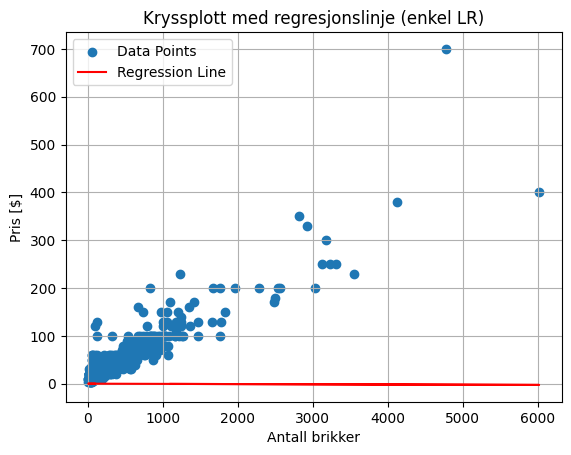

In [51]:
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

AttributeError: 'LogitResults' object has no attribute 'resid'

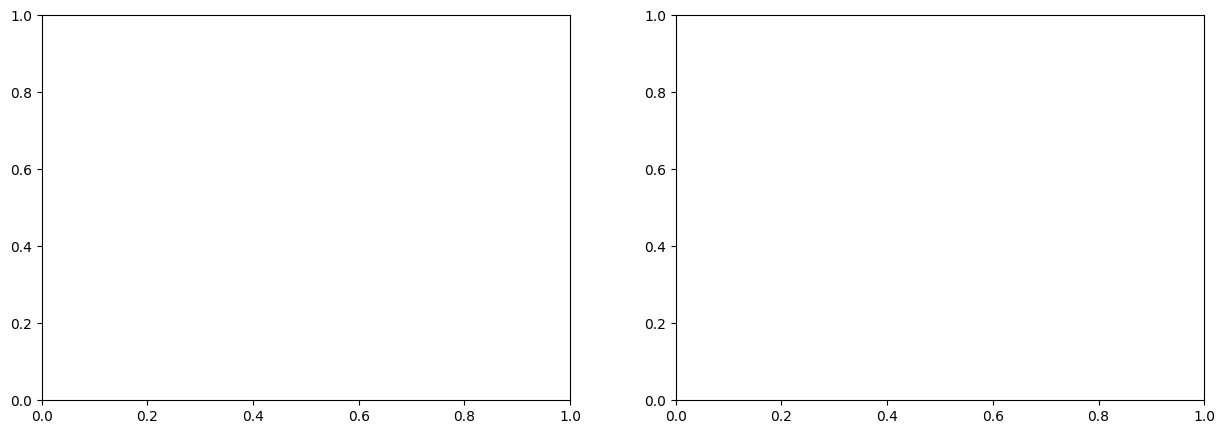

In [52]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

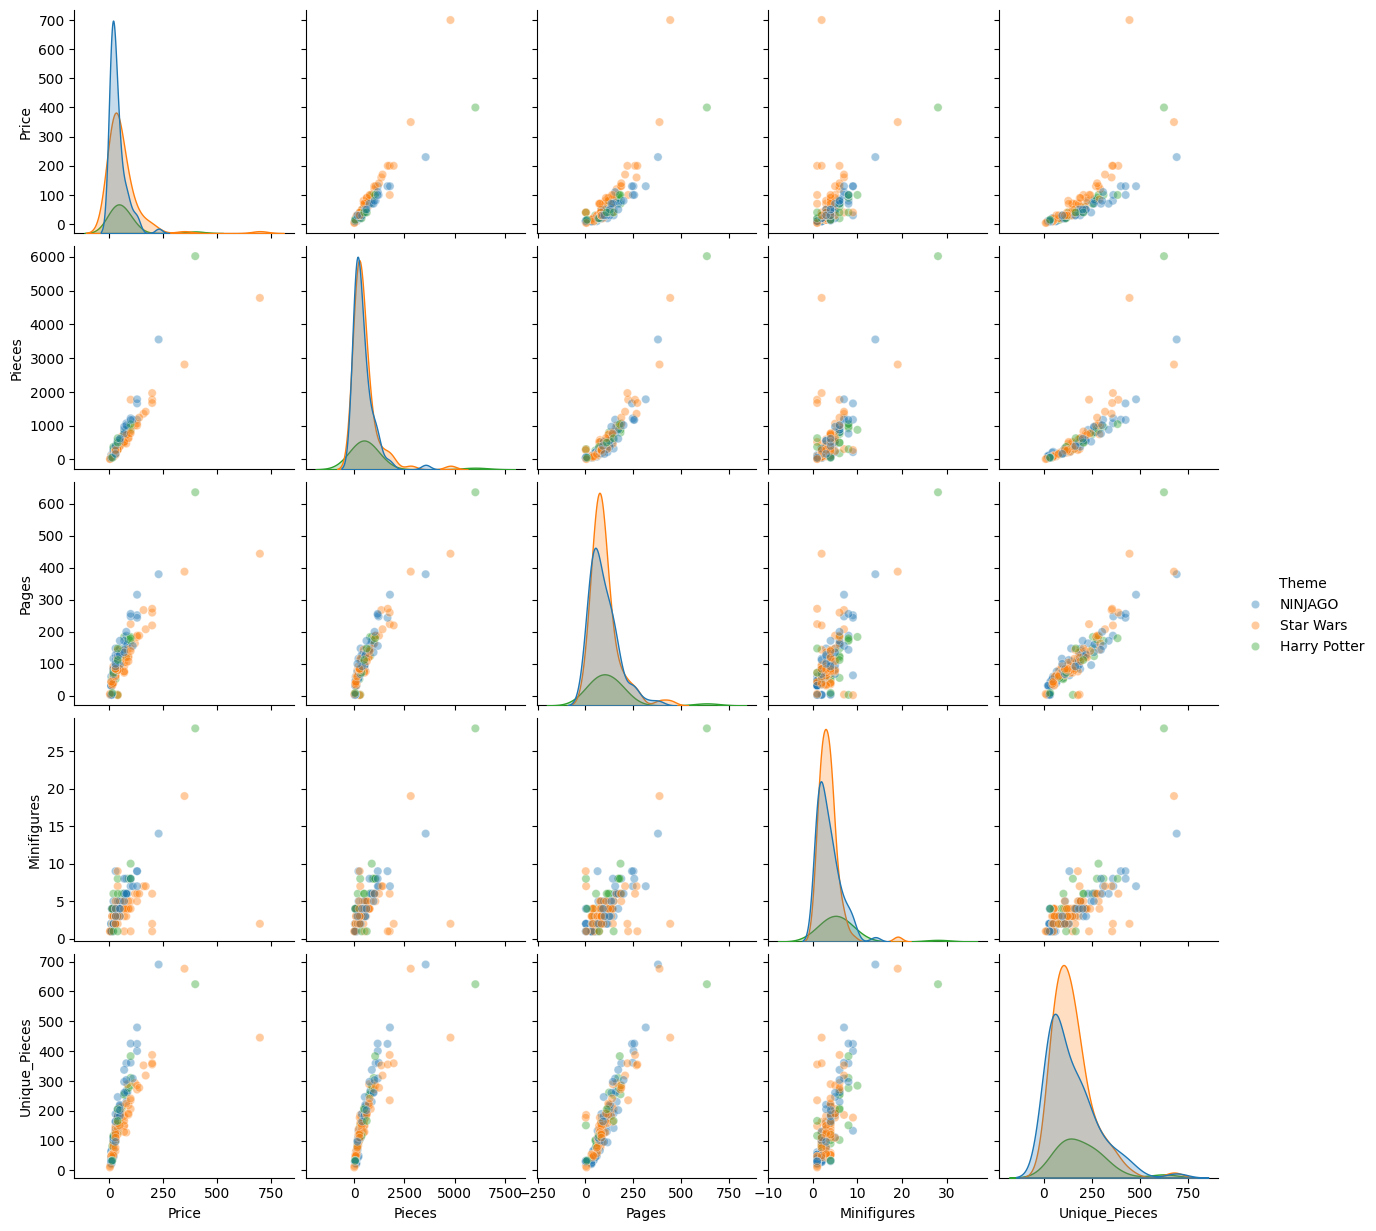

In [ ]:
mythemes = ['Star Wars', 'NINJAGO', 'Harry Potter']
subset_df = df2[df2['Theme'].isin(mythemes)]
sns.pairplot(subset_df, vars = ['Price', 'Pieces', 'Pages', 'Minifigures', 'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [ ]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()

In [ ]:
# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Theme'].isin([theme])])
    resultater.append(modell3.fit())

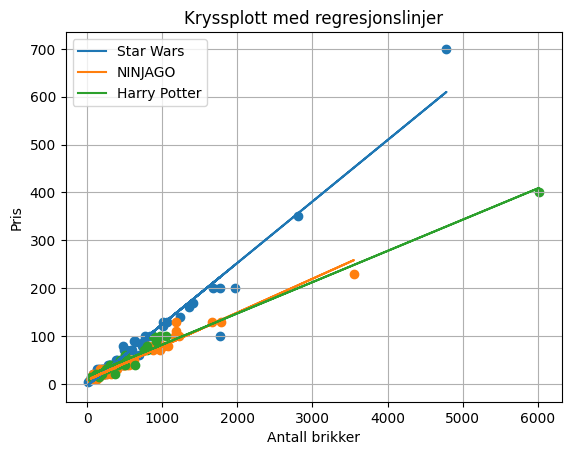

In [ ]:
# plott av dataene og regresjonslinjene
for i, theme in enumerate(mythemes):
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

## 

In [ ]:
# multippel lineær regresjon
modell3_mlr = smf.ols('LegoGroup ~ Price' , data = subset_df)
modell3_mlr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LegoGroup   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     5.251
Date:                Mon, 06 Nov 2023   Prob (F-statistic):             0.0231
Time:                        14:45:32   Log-Likelihood:                -128.45
No. Observations:                 184   AIC:                             260.9
Df Residuals:                     182   BIC:                             267.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4789      0.045     10.721      0.000       0.391       0.567
Price         -0.0011      0.001     -2.291      0.023      -0.002      -0.000
==============================================================================
Omnibus:                     1168.903   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.239
Skew:                           0.291   Prob(JB):                     4.48e-07
Kurtosis:                       1.136   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# multippel lineær regresjon med en annen referansekategori
modell3_mlr_alt = smf.ols('Price ~ Pieces + C(Theme, Treatment("Star Wars"))' , data = subset_df)
modell3_mlr_alt.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     405.9
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           7.75e-80
Time:                        14:45:04   Log-Likelihood:                -859.58
No. Observations:                 184   AIC:                             1727.
Df Residuals:                     180   BIC:                             1740.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           14.1448      3.163      4.472      0.000       7.904      20.386
C(Theme, Treatment("Star Wars"))[T.Harry Potter]   -18.5491      6.288     -2.950      0.004     -30.956      -6.142
C(Theme, Treatment("Star Wars"))[T.NINJAGO]        -16.1278      4.119     -3.915      0.000     -24.256      -7.999
Pieces                                               0.0934      0.003     34.324      0.000       0.088       0.099
==============================================================================
Omnibus:                      169.225   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16631.576
Skew:                           2.694   Prob(JB):                         0.00
Kurtosis:                      49.263   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

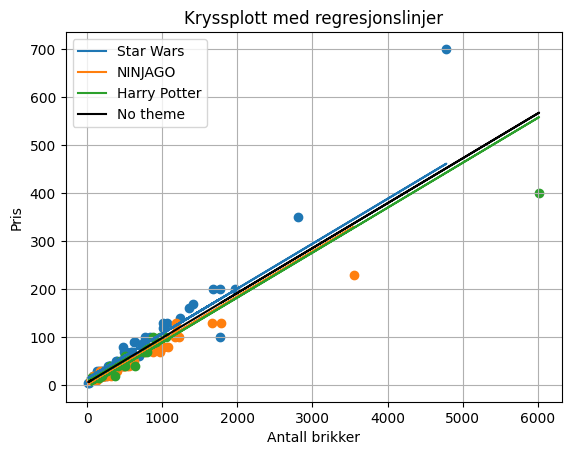

In [ ]:
# plott
intercept = [modell3_mlr.fit().params['Theme[T.Star Wars]'], modell3_mlr.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlr.fit().params['Intercept']
slope = modell3_mlr.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label = 'No theme')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols('Price ~ Pieces*Theme' , data = subset_df)
modell3_mlri.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     833.9
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          1.84e-121
Time:                        15:26:42   Log-Likelihood:                -754.15
No. Observations:                 184   AIC:                             1520.
Df Residuals:                     178   BIC:                             1540.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    16.8126      3.742      4.493      0.000       9.428      24.197
Theme[T.NINJAGO]             -8.8891      4.330     -2.053      0.042     -17.433      -0.345
Theme[T.Star Wars]          -20.5964      4.250     -4.846      0.000     -28.983     -12.209
Pieces                        0.0652      0.003     24.506      0.000       0.060       0.070
Pieces:Theme[T.NINJAGO]       0.0053      0.004      1.289      0.199      -0.003       0.014
Pieces:Theme[T.Star Wars]     0.0630      0.004     17.717      0.000       0.056       0.070
==============================================================================
Omnibus:                      142.464   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9093.055
Skew:                          -2.125   Prob(JB):                         0.00
Kurtosis:                      37.176   Cond. No.                     6.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

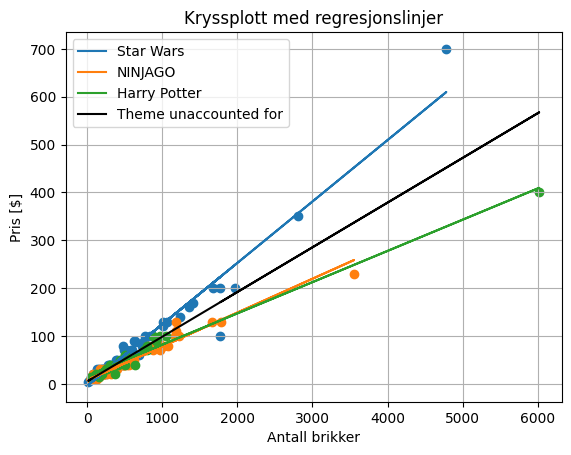

In [ ]:
# plott
intercept = [modell3_mlri.fit().params['Theme[T.Star Wars]'], modell3_mlri.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Intercept']
slope = [modell3_mlri.fit().params['Pieces:Theme[T.Star Wars]'], modell3_mlri.fit().params['Pieces:Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label='Theme unaccounted for')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Kode for å lagre plot som (.png)
## fjern 'plt.show()' og erstatt med:
# plt.savefig('my_plot.png')

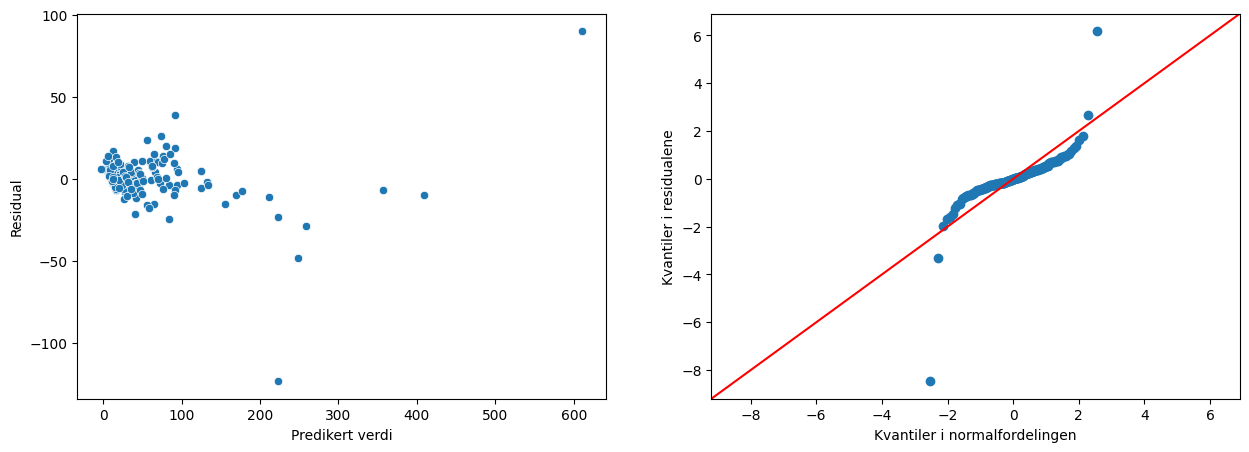

In [ ]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [ ]:
# Gruppere temaer i nye grupper:
# (Harry Potter, NINJAGO og Star Wars havner i én gruppe, City og Friends i en annen, og alle andre i en tredje)
df2['LegoGroup'] = np.where(df2['Theme'].isin(['Harry Potter', 'Star Wars', 'Batman', 'DC', 'Disney', 'Marvel', 'Minecraft', 'LEGO Frozen 2', 'Trolls World Tour', 'Minions', 'Powerpuff Girls', 'Jurassic World', 'Overwatch', 'Spider-Man', 'Stranger Things']), 0, 
                      np.where(df2['Theme'].isin(['City', 'Friends', 'Unikitty', 'NINJAGO', 'DUPLO', 'THE LEGO MOVIE 2', 'Speed Champions', 'Hidden Side', 'Classic', 'Juniors', 'Creator 3-in-1', 'Ideas', 'Creator Expert', 'Monkie Kid', 'Minifigures', 'Powered UP']), 1, 2))
df2.groupby(['LegoGroup']).size().reset_index(name = 'Count')

,LegoGroup,Count
0,0,282
1,1,432


In [ ]:
df2.groupby(['LegoGroup', 'Theme']).size().reset_index(name = 'Count')

,LegoGroup,Theme,Count
0,0,Batman,16
1,0,DC,8
2,0,Disney,35
3,0,Harry Potter,22
4,0,Jurassic World,19
5,0,LEGO Frozen 2,7
6,0,Marvel,47
7,0,Minecraft,21
8,0,Minions,2
9,0,Overwatch,7


In [ ]:
modell3_mlr = smf.ols('Price ~ LegoGroup + Pieces' , data = df2)
modell3_mlr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1913.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          6.76e-287
Time:                        18:45:18   Log-Likelihood:                -3191.8
No. Observations:                 714   AIC:                             6390.
Df Residuals:                     711   BIC:                             6403.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4611      1.281      6.603      0.000       5.946      10.977
LegoGroup      1.8700      0.864      2.163      0.031       0.173       3.567
Pieces         0.0874      0.001     61.860      0.000       0.085       0.090
==============================================================================
Omnibus:                      661.420   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64659.665
Skew:                           3.716   Prob(JB):                         0.00
Kurtosis:                      49.024   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""